# COMP 433 Deep Learning Lab Tutorial 2

In this lab tutorial we will cover aspects such as data visualization, multi-class classification, and hyperparameter tunning.

<div style="border-bottom: 3px solid black;"></div>

## 1) Data Visualization (Sklearn + Matplotlib)

Why Visualize Data?

- Visualizations help us gain insights into the dataset by showing patterns or trends that might not be immediately apparent from raw data.
- It is especially useful in understanding relationships between features, class distributions, and spotting any anomalies or missing values.

In [41]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import pandas as pd

Import the Iris dataset from Sklearn

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a **150x4** numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [5]:
# Load the iris dataset
iris = datasets.load_iris()

⚠️ A good exercise is to always check the shape of your data to get an idea about how many data samples exists and how many features there are!

If you run the cell below you will notice that the Iris dataset has 150 samples (very small dataset) and each sample has 4 features

In [9]:
iris.data.shape

(150, 4)

We can also put the Iris dataset in a Pandas dataframe which is sometimes useful for visualization tasks

In [15]:
# Put the Iris data in a Pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


🤓Let's see how that looks like with Matplotlib

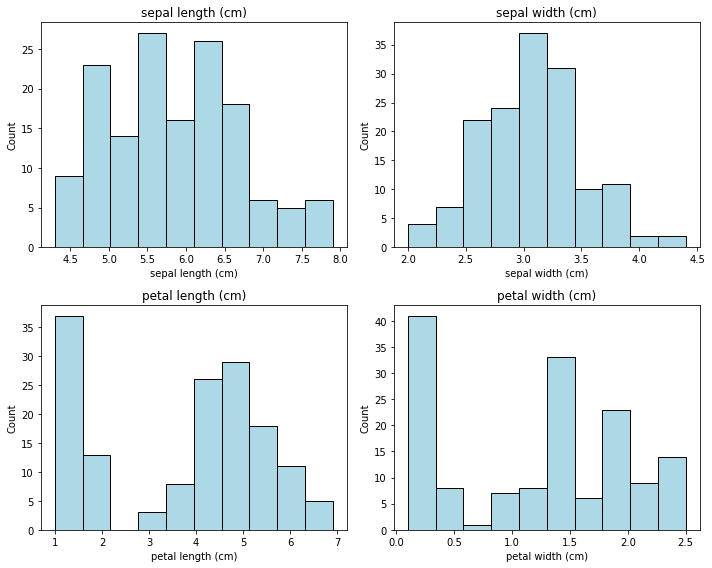

In [16]:
plt.figure(figsize=(10, 8))

# Loop over each column to create a histogram
for i, column in enumerate(df.columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for the histograms
    
    # Divide the values into "bins"
    plt.hist(df[column], bins=10, color='lightblue', edgecolor='black')  
    
    # Plot settings
    plt.title(f'{column}')  # Title for each plot
    plt.xlabel(column)      # X-axis label
    plt.ylabel('Count')     # Y-axis label

# Show the histograms
plt.tight_layout()
plt.show()

⚠️The Iris dataset is 4 dimensional dataset (4 features!). Therefore, you could either visualize each two dimensions at a time or you could employ dimensionality reduction techniques such as PCA or T-SNE to visualize the data in a lower dimension (i.e. 2 or 3 dimensions). For the sake of simplicity let us do a scatter plot of just two feature ofthe Iris dataset using Matplotlib

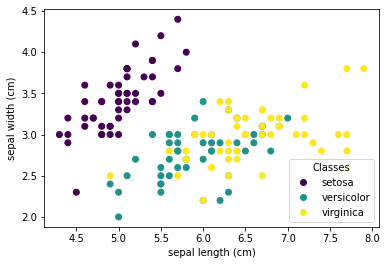

In [25]:
plt.figure(figsize=(6, 4))

# Scatter plot
scatter = plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')

# Add labels to the axes
plt.xlabel(iris.feature_names[0])  # Sepal Length
plt.ylabel(iris.feature_names[1])  # Sepal Width

# Step 4: Add a legend
legend_labels = iris.target_names              # Get species names (Setosa, Versicolor, Virginica)
legend_handles = scatter.legend_elements()[0]  # Get handles (colored dots for the legend)
plt.legend(legend_handles, legend_labels, title="Classes", loc="lower right")

# Step 5: Show the plot
plt.show()


<div style="border-bottom: 3px solid black;"></div>

## 2) Multi-class Classification

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [27]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Logistic Regression for multi-class classification
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions and report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<div style="border-bottom: 3px solid black;"></div>

## 3) Hyperparameter Tunning 

**Hyperparameter search** is a particular *model selection* procedure that focuses on selecting one model from a family of related models. Hyperparameter search can therefore be seen as a "model tuning" procedure. A good hyperparameter search procedure will find good hyperparameters (hyperparameters estimated to have good test-time performance) using very few "attempts", since each attempt requires performing cross validation and this can be computationally demanding.

To see what this means, let's train an RBF SVM on the training data using different hyperparameter settings. The specific hyperparameters that you will inspect are C (the slack penalty) and the gamma (the RBF kernel spread).


In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [40]:
# Grid parameters C and Gamma
C_var=np.logspace(0,3,4)
gamma_var=np.logspace(-2,1,num=4)

In [42]:
# Training several SVM models with different hyperparameters
for c in range(len(C_var)):
    for g in range(len(gamma_var)):
        clf=sklearn.svm.SVC(C=C_var[c],kernel='rbf',gamma=gamma_var[g])
        svm=clf.fit(X_train,y_train)
        acc_training= sklearn.metrics.accuracy_score(y_train,svm.predict(X_train))*100
        print(f"{acc_training:.1f}% training accuracy for C= {C_var[c]} and gamma= {gamma_var[g]}")

93.3% training accuracy for C= 1.0 and gamma= 0.01
96.2% training accuracy for C= 1.0 and gamma= 0.1
99.0% training accuracy for C= 1.0 and gamma= 1.0
100.0% training accuracy for C= 1.0 and gamma= 10.0
96.2% training accuracy for C= 10.0 and gamma= 0.01
98.1% training accuracy for C= 10.0 and gamma= 0.1
98.1% training accuracy for C= 10.0 and gamma= 1.0
100.0% training accuracy for C= 10.0 and gamma= 10.0
98.1% training accuracy for C= 100.0 and gamma= 0.01
97.1% training accuracy for C= 100.0 and gamma= 0.1
99.0% training accuracy for C= 100.0 and gamma= 1.0
100.0% training accuracy for C= 100.0 and gamma= 10.0
95.2% training accuracy for C= 1000.0 and gamma= 0.01
98.1% training accuracy for C= 1000.0 and gamma= 0.1
100.0% training accuracy for C= 1000.0 and gamma= 1.0
100.0% training accuracy for C= 1000.0 and gamma= 10.0


🤓Notice how the training accuracy changes with changing hyperparameters!

Now let's do grid search to fit out the hyperparmeters that would lead to the best performance using GridSearchCV

In [52]:
# Parameter Grid
param_grid={'C':C_var,'gamma': gamma_var}

# Grid Search
GridSearchCV=sklearn.model_selection.GridSearchCV(clf, param_grid,verbose=1,cv=3)
model = GridSearchCV.fit(X_train,y_train)

# The best parameters
C = GridSearchCV.best_params_["C"]
gamma = GridSearchCV.best_params_["gamma"]

print(f"The validation score is {GridSearchCV.best_score_*100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
The validation score is 96.19%


Grid Hyperparameter search can be seen as an exhuastive search approach to find the best model congifuration. However, it is not necessarily the best, especially in terms of computation efficiency. Thus, random hyperparameter search has been applied widely in various research studies.

**<u>Random hyerperarameter search</u>** does not take a list of grid values, but instead takes distributions that it samples hperparameters from.  

Thus, using a properly distribution for sampling the hyperparameters would be very important. For example, if we sampled from a uniform distribution ([scipy.stats.uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)) in range $[1, 1000]$, there's only a 1\% chance that we'd sample a value between $1$ and $10$. Instead, we can sample from the *reciprocal* distribution ([scipy.stats.reciprocal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.reciprocal.html)) which has logarithmic spacing between samples. A reciprocal distribution over range $[1, 1000]$ has the same chance of drawing a sample in range $[1, 10]$ as it does in range $[10, 100]$ or in range $[100, 1000]$. It is therefore also called a *log uniform* distribution.


In [54]:
import scipy

In [70]:
clf=sklearn.svm.SVC(kernel='rbf')
param_distributions=dict(C=scipy.stats.reciprocal(1, 1000),gamma=scipy.stats.reciprocal(0.01, 10))

# Random Search
RndSearchCV=sklearn.model_selection.RandomizedSearchCV(clf,param_distributions,cv=5,n_iter=30,random_state=0)
RndSearchCV.fit(X_train,y_train)

# The best parameters
C = RndSearchCV.best_params_["C"]
gamma = RndSearchCV.best_params_["gamma"]

print(f"The validation score is {RndSearchCV.best_score_*100:.2f}%")

The validation score is 97.14%


## K- Nearest Neighbor (KNN) Classifier/Regressor

A KNN classifier does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple **majority vote** of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The pseudocode looks something like so: 

1. Load the training and test data (Already done above with the Iris dataset)
2. Choose the value of K (hyperparameter!)
3. For each point in test data:
       - find the Euclidean distance to all training data points (you can use the distances fn you implemented in Lab1)
       - store the Euclidean distances in a list and sort it 
       - choose the first k points 
       - assign a class to the test point based on the majority of classes present in the chosen points
4. End 